In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from math import floor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

import warnings 
    
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-churn-prediction-project/CustomerChurnData.xlsx


## Data Description and Data Report

In [5]:
df= pd.read_excel("/kaggle/input/customer-churn-prediction-project/CustomerChurnData.xlsx", sheet_name=1)
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Tenure,11158,38,1,1351
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
Account_user_count,11148,7,4,4569
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
rev_per_month,11158,59,3,1746
rev_growth_yoy,11260,20,14,1524
coupon_used_for_payment,11260,20,1,4373
Day_Since_CC_connect,10903,24,3,1816


In [9]:
df.shape

(11260, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [11]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [12]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [13]:
df['Churn'].value_counts()/len(df['Churn'])

Churn
0    0.831616
1    0.168384
Name: count, dtype: float64

In [14]:
df['Payment'].value_counts()

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [16]:
df['City_Tier'].value_counts()

City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64

In [17]:
df['account_segment'].value_counts()

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64

In [18]:
df['Marital_Status'].value_counts()

Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64

In [19]:
df['Login_device'].value_counts()

Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: count, dtype: int64

In [20]:
pd.pivot_table(df,values='CC_Agent_Score', index='Marital_Status', columns='City_Tier', aggfunc='mean')

City_Tier,1.0,2.0,3.0
Marital_Status,,,
Divorced,3.228324,3.742424,3.236190
Married,3.051053,3.278146,2.960414
Single,3.035230,2.755102,3.038767


In [21]:
df['Account_user_count'].value_counts()

Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: count, dtype: int64

## Data cleaning 

- Data cleaning steps:

1. Change the data types of columns
2. Missing values treatment
3. Replace incorrect values from featureset (replace unwanted charactors like @ # $ * to appropiate value)

In [22]:
def clean_data(df):
    # Replace gaps forward from the previous valid value in: 'City_Tier'
    df = df.fillna({'City_Tier': df['City_Tier'].ffill()})
    # Replace missing values with the median of each column in: 'CC_Contacted_LY'
    df = df.fillna({'CC_Contacted_LY': df['CC_Contacted_LY'].median()})
    # Replace missing values with the most common value of each column in: 'Payment'
    df = df.fillna({'Payment': df['Payment'].mode()[0]})
    # Replace all instances of "F" with "Female" in column: 'Gender'
    df.loc[df['Gender'].str.lower() == "F".lower(), 'Gender'] = "Female"
    # Replace all instances of "M" with "Male" in column: 'Gender'
    df.loc[df['Gender'].str.lower() == "M".lower(), 'Gender'] = "Male"
    # Replace gaps forward from the previous valid value in: 'Gender'
    df = df.fillna({'Gender': df['Gender'].ffill()})
    # Replace missing values with the median of each column in: 'Service_Score'
    df = df.fillna({'Service_Score': df['Service_Score'].median()})
    # Replace missing values with the most common value of each column in: 'account_segment'
    df = df.fillna({'account_segment': df['account_segment'].mode()[0]})
    # Change column type to object for column: 'Account_user_count'
    df = df.astype({'Account_user_count': 'object'})
    # Replace missing values with the median of each column in: 'CC_Agent_Score'
    df = df.fillna({'CC_Agent_Score': df['CC_Agent_Score'].median()})
    # Replace gaps forward from the previous valid value in: 'Marital_Status'
    df = df.fillna({'Marital_Status': df['Marital_Status'].ffill()})
    # Replace missing values with the median of each column in: 'Complain_ly'
    df = df.fillna({'Complain_ly': df['Complain_ly'].median()})
    # Replace all instances of "&&&&" with "Mobile & Computer" in column: 'Login_device'
    df.loc[df['Login_device'].str.lower() == "&&&&".lower(), 'Login_device'] = "Mobile & Computer"
    # Replace missing values with the most common value of each column in: 'Login_device'
    df = df.fillna({'Login_device': df['Login_device'].mode()[0]})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [23]:
## 'Tenure' column treatment - change values and dtype, missing val
df_clean['Tenure'] = df_clean['Tenure'].replace({'#':'1'})
df_n = df_clean.copy()
df_n['Tenure'] = df_n['Tenure'].fillna(df_clean['Tenure'].median())
df_n['Tenure'] = df_n['Tenure'].astype(int)

In [24]:
## "Account_user_count" column treatment - change values and dtype, missing val
df_n['Account_user_count'] = df_n['Account_user_count'].replace({'@':'4'})
df_n['Account_user_count'] = df_n['Account_user_count'].fillna(df_n['Account_user_count'].median())
df_n['Account_user_count'] = df_n['Account_user_count'].astype(int)

In [25]:
## "rev_per_month" col treatment - change values, and dtype, missing val
df_n['rev_per_month'] = df_n['rev_per_month'].replace({'+':'3'})
df_n['rev_per_month'] = df_n['rev_per_month'].fillna(df_n['rev_per_month'].median())
df_n['rev_per_month'] = df_n['rev_per_month'].astype(int)

In [26]:
## "revv_growth_yoy" col treatment - dtype
df_n['rev_growth_yoy'] = df_n['rev_growth_yoy'].replace({'$':'14'})
df_n['rev_growth_yoy'] = df_n['rev_growth_yoy'].astype(int)

In [27]:
## "coupoun_used_for_payment" col treatment - dtype
df_n['coupon_used_for_payment'] = df_n['coupon_used_for_payment'].replace({'$':'1','#':'1','*':'1'})
df_n['coupon_used_for_payment'] = df_n['coupon_used_for_payment'].astype(int)

In [28]:
## "Day_Since_CC_connect" col - missing values
df_n['Day_Since_CC_connect'] = df_n['Day_Since_CC_connect'].replace({'$':'3'})
df_n['Day_Since_CC_connect'] = df_n['Day_Since_CC_connect'].fillna(df_n['Day_Since_CC_connect'].median())
df_n['Day_Since_CC_connect'] = df_n['Day_Since_CC_connect'].astype(int)

In [29]:
## "cashback" col - missing value
df_n['cashback'] = df_n['cashback'].replace({'$':'155.62'})
df_n['cashback'] = df_n['cashback'].fillna(df_n['cashback'].median())
df_n['cashback'] = df_n['cashback'].astype(float)

In [30]:
## remove accountID column
df_new = df_n.drop(columns=["AccountID"])
df_final = df_new.copy()

- **Outliar treatment of rev_per_month**

In [31]:
# Calculate IQR for each column
Q1 = df_final['rev_per_month'].quantile(0.25)
Q3 = df_final['rev_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter rows using IQR formulas
df_filtered = df_final[~((df_final['rev_per_month'] < lower_bound) | (df_final['rev_per_month'] > upper_bound))]
df_filtered

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.90,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,165.24,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.60,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.90,Computer


### Clean dataset report

In [32]:
# final clean dataframe for further analysis, visualization prep
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11075 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11075 non-null  int64  
 1   Tenure                   11075 non-null  int64  
 2   City_Tier                11075 non-null  float64
 3   CC_Contacted_LY          11075 non-null  float64
 4   Payment                  11075 non-null  object 
 5   Gender                   11075 non-null  object 
 6   Service_Score            11075 non-null  float64
 7   Account_user_count       11075 non-null  int64  
 8   account_segment          11075 non-null  object 
 9   CC_Agent_Score           11075 non-null  float64
 10  Marital_Status           11075 non-null  object 
 11  rev_per_month            11075 non-null  int64  
 12  Complain_ly              11075 non-null  float64
 13  rev_growth_yoy           11075 non-null  int64  
 14  coupon_used_for_payment  11

In [33]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11075.0,0.167223,0.373192,0.0,0.00,0.00,0.00,1.0
Tenure,11075.0,10.897336,12.835648,0.0,2.00,8.00,16.00,99.0
City_Tier,11075.0,1.657517,0.916308,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11075.0,17.839729,8.809774,4.0,11.00,16.00,23.00,132.0
Service_Score,11075.0,2.901761,0.722276,0.0,2.00,3.00,3.00,5.0
Account_user_count,11075.0,3.703205,1.005109,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11075.0,3.063386,1.373249,1.0,2.00,3.00,4.00,5.0
rev_per_month,11075.0,4.987720,2.771900,1.0,3.00,4.00,7.00,13.0
Complain_ly,11075.0,0.275576,0.446824,0.0,0.00,0.00,1.00,1.0
rev_growth_yoy,11075.0,16.180497,3.753587,4.0,13.00,15.00,19.00,28.0


In [34]:
df_filtered['Churn'].value_counts()

Churn
0    9223
1    1852
Name: count, dtype: int64

In [35]:
df_filtered.describe(include='object').T

,count,unique,top,freq
Payment,11075,5,Debit Card,4618
Gender,11075,2,Male,6667
account_segment,11075,7,Super,4090
Marital_Status,11075,3,Married,5885
Login_device,11075,3,Mobile,7568


In [36]:
df_filtered.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [37]:
# count of unique values in each col
def unique_count(col):
    count = len(df_filtered[col].unique())
    print(f"for {col} column: ", count)
    
for df in list(df_filtered.columns):
    unique_count(df)

for Churn column:  2
for Tenure column:  37
for City_Tier column:  3
for CC_Contacted_LY column:  44
for Payment column:  5
for Gender column:  2
for Service_Score column:  6
for Account_user_count column:  6
for account_segment column:  7
for CC_Agent_Score column:  5
for Marital_Status column:  3
for rev_per_month column:  13
for Complain_ly column:  2
for rev_growth_yoy column:  19
for coupon_used_for_payment column:  17
for Day_Since_CC_connect column:  23
for cashback column:  5630
for Login_device column:  3


In [38]:
# value counts of cols
def value_Counts(col):
    vc = dict(df_filtered[col].value_counts())
    print(f"value counts for each categories of {col}:", vc)

value_Counts('Gender')
value_Counts('Payment')
value_Counts('account_segment')
value_Counts('Marital_Status')
value_Counts('Login_device')

value counts for each categories of Gender: {'Male': 6667, 'Female': 4408}
value counts for each categories of Payment: {'Debit Card': 4618, 'Credit Card': 3446, 'E wallet': 1210, 'Cash on Delivery': 997, 'UPI': 804}
value counts for each categories of account_segment: {'Super': 4090, 'Regular Plus': 3801, 'HNI': 1603, 'Super Plus': 758, 'Regular': 514, 'Regular +': 262, 'Super +': 47}
value counts for each categories of Marital_Status: {'Married': 5885, 'Single': 3523, 'Divorced': 1667}
value counts for each categories of Login_device: {'Mobile': 7568, 'Computer': 2968, 'Mobile & Computer': 539}


## Exploratory Data Analysis and Data Visualization

In [39]:
obj_col = ['Payment','Gender','account_segment','Marital_Status','Login_device']
num_col = [col for col in list(df_filtered.columns) if df_filtered[col].dtype != 'object']

# classification of columns based on cardinality
num_dis_col = [col for col in list(df_filtered.columns) if (len(df_filtered[col].unique()) < 10 and df_filtered[col].dtype != 'object')]
num_cont_col = [col for col in list(df_filtered.columns) if len(df_filtered[col].unique()) > 10]

### Univariate analysis of features

Churn
1    1852
0    9223
Name: count, dtype: int64
the churn ratio labels are:  [1, 0]


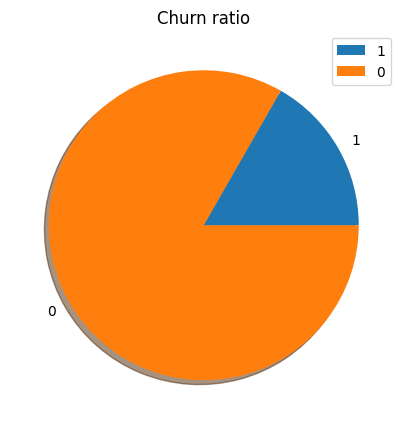

In [40]:
churn = df_filtered['Churn'].value_counts(sort=False)
print(churn)
Labels = [x for x in df_filtered['Churn'].unique()]
print('the churn ratio labels are: ', Labels)
plt.figure(figsize=(5,65))
plt.pie(churn.values, labels=Labels, shadow=True)
plt.legend()
plt.title('Churn ratio')
plt.show()

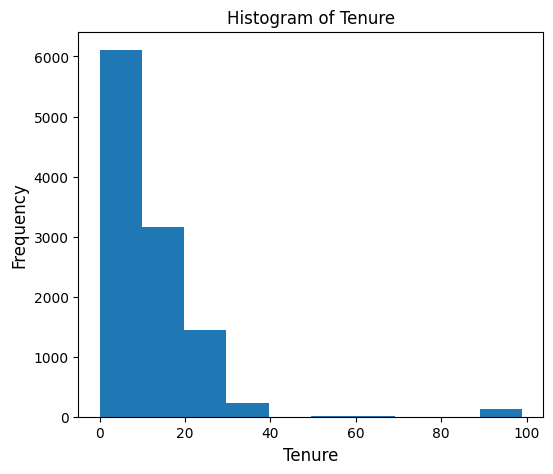

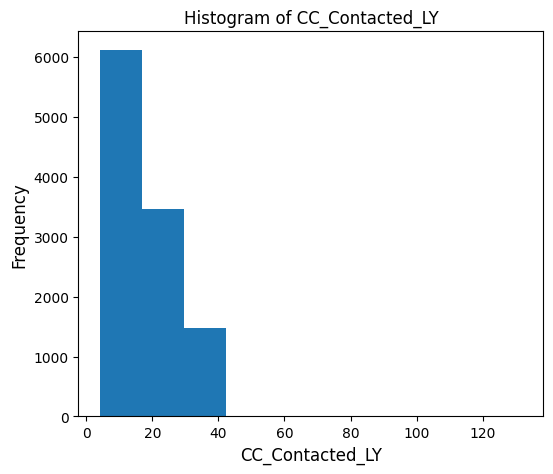

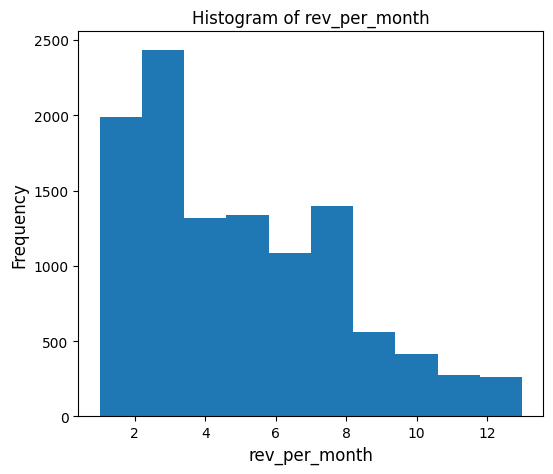

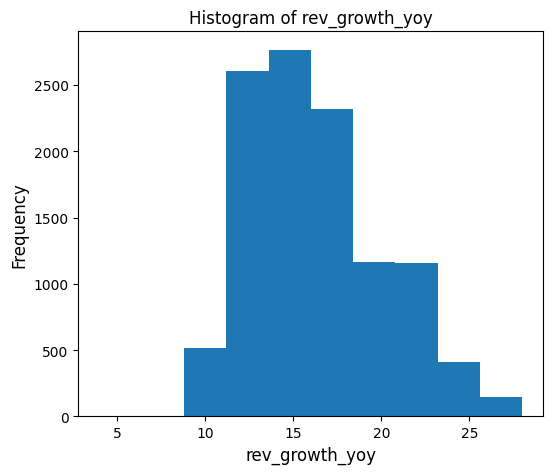

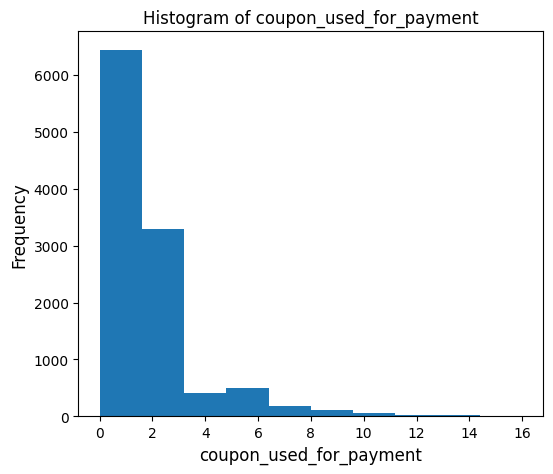

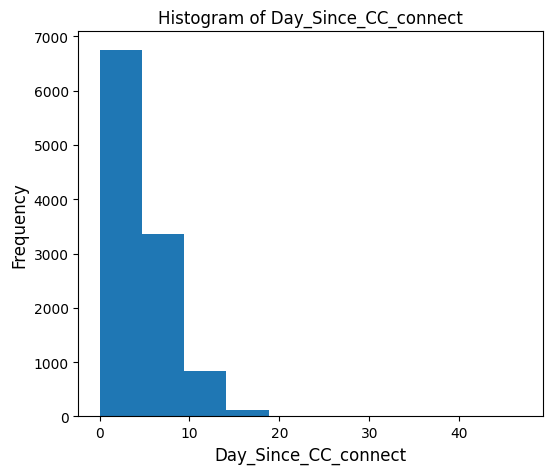

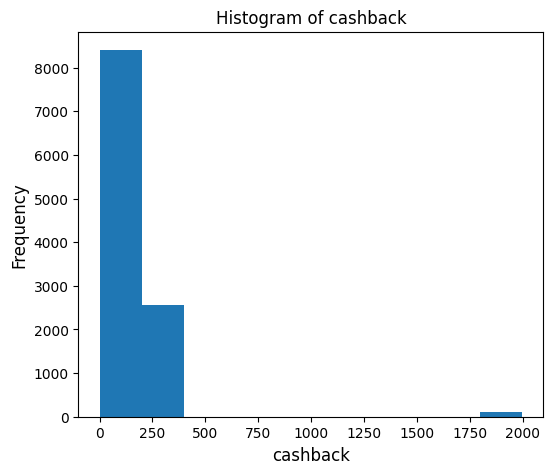

In [41]:
# histogram for continous columns
for col in num_cont_col:
    df_filtered[col].plot.hist(title=f'Histogram of {col}', figsize=(6,5))
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

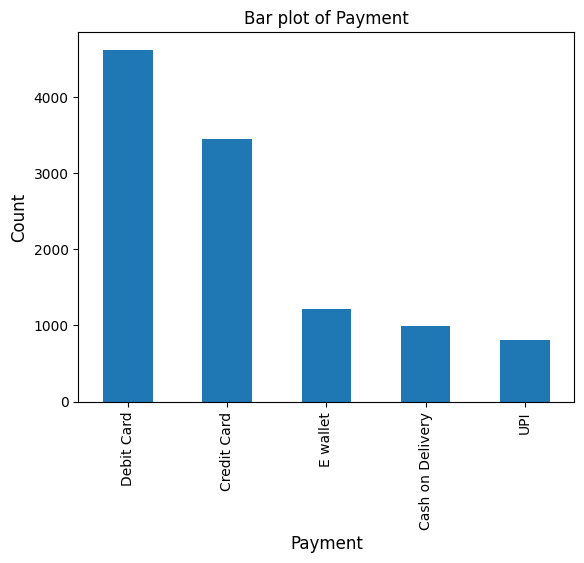

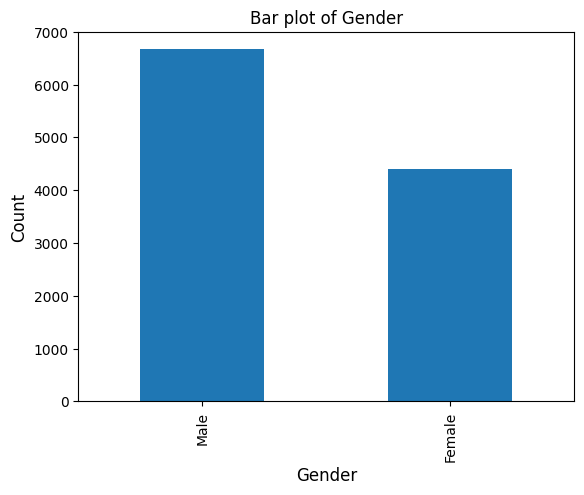

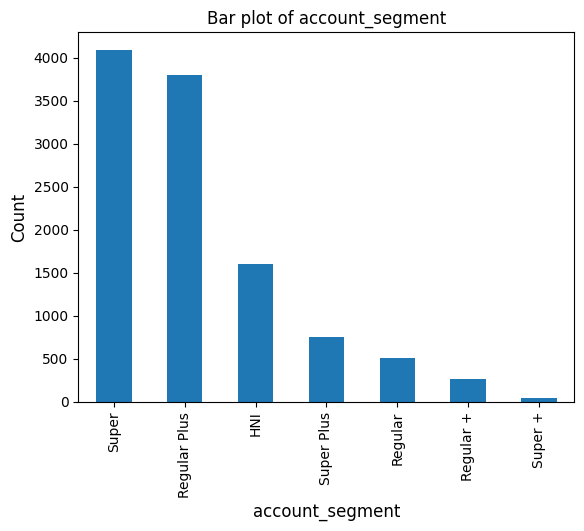

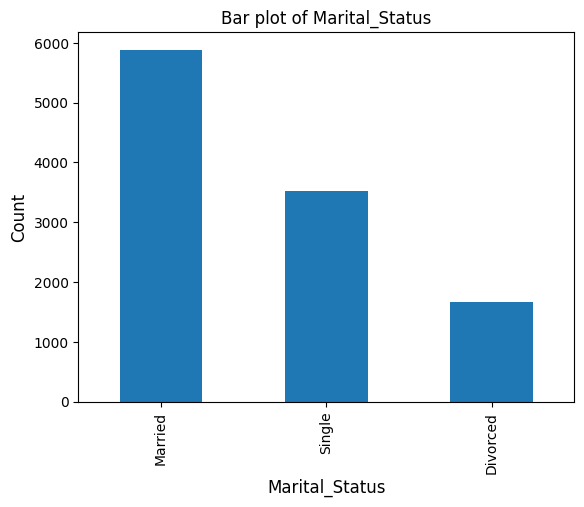

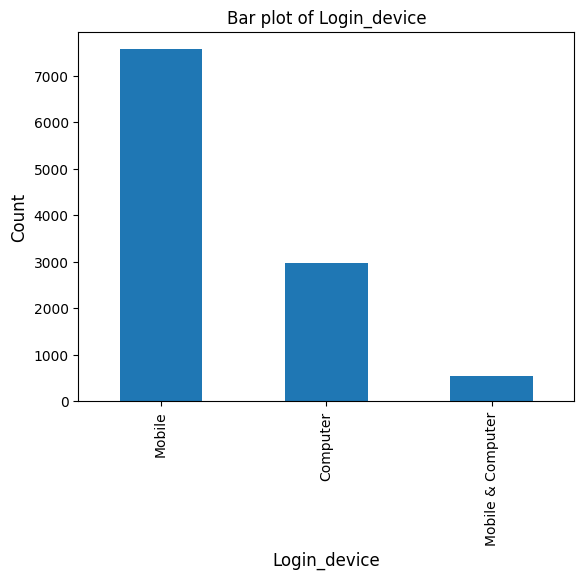

In [42]:
# bar plot of object cols
for col in obj_col:
    df_filtered[col].value_counts().plot.bar(title=f'Bar plot of {col}')
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

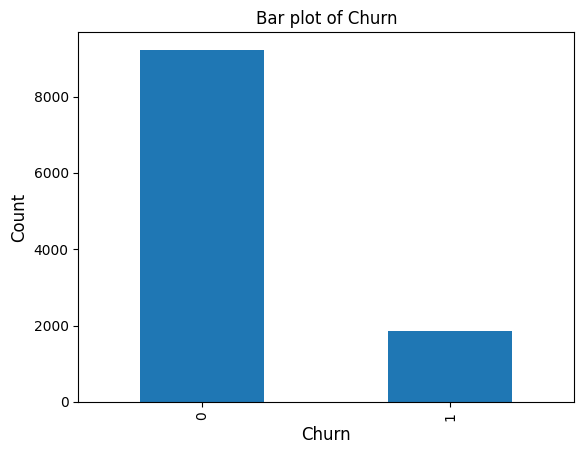

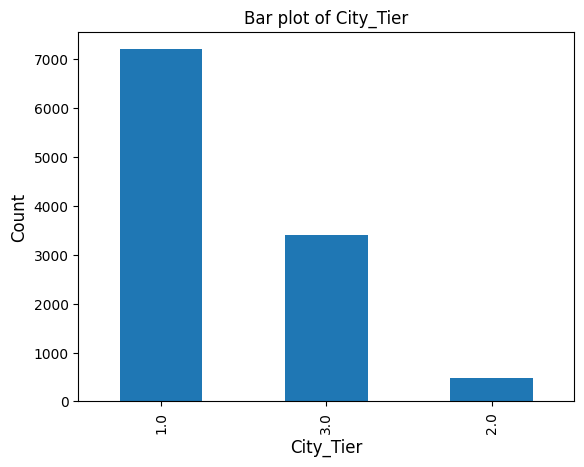

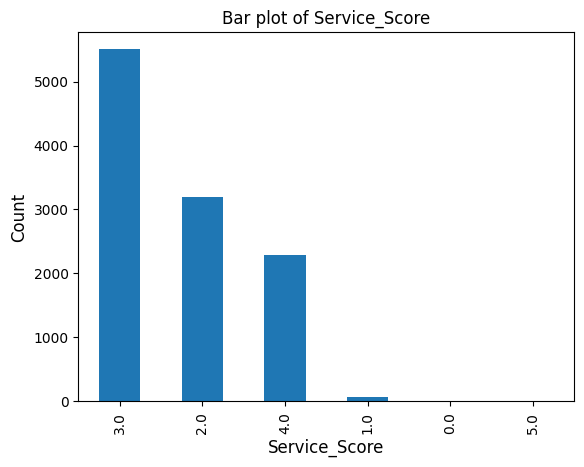

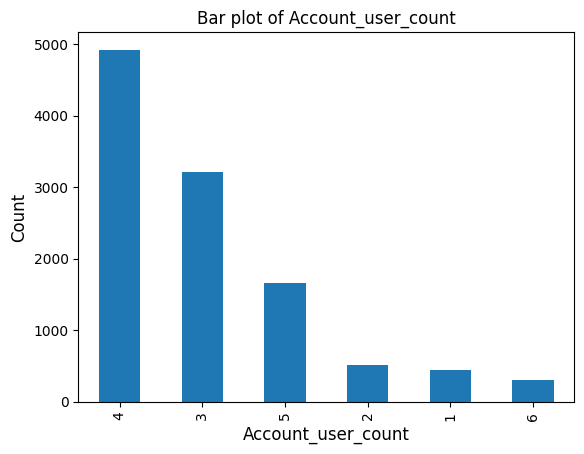

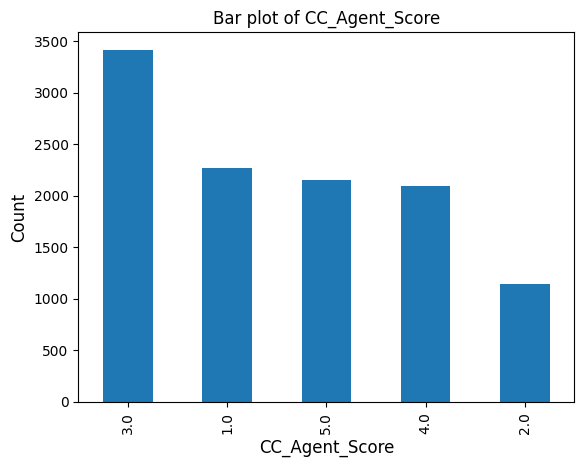

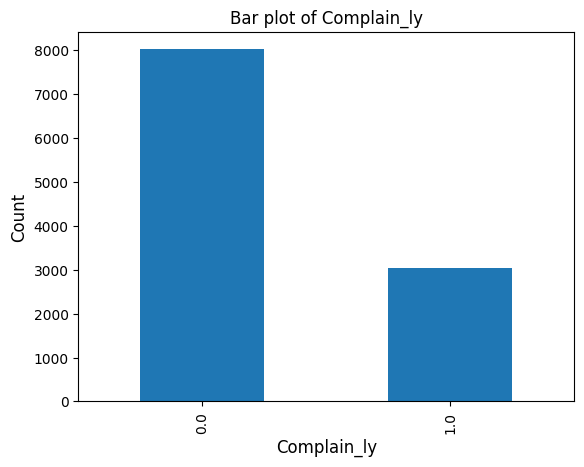

In [43]:
# bar plot of discreat features
for col in num_dis_col:
    df_filtered[col].value_counts().plot.bar(title=f'Bar plot of {col}')
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

### Bivariate analysis of features

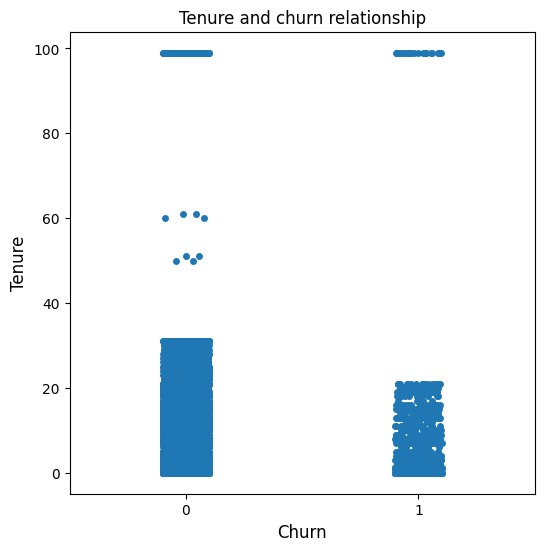

In [44]:
plt.figure(figsize=(6,6))
sns.stripplot(x='Churn', y='Tenure', data=df_filtered).set_title('Tenure and churn relationship')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Tenure", fontsize=12)
plt.show()

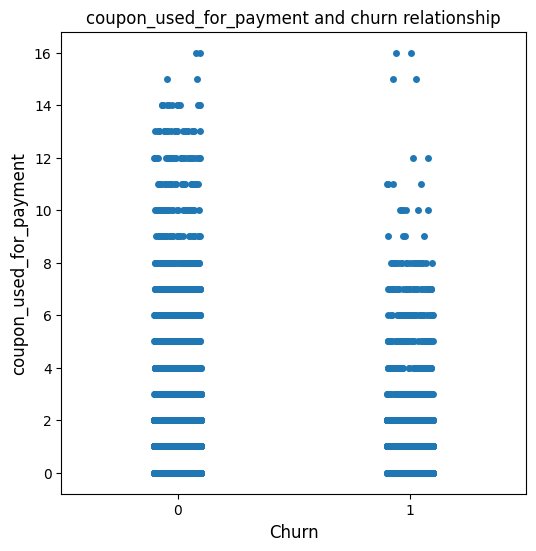

In [45]:
plt.figure(figsize=(6,6))
sns.stripplot(x='Churn', y='coupon_used_for_payment', data=df_filtered).set_title('coupon_used_for_payment and churn relationship')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("coupon_used_for_payment", fontsize=12)
plt.show()

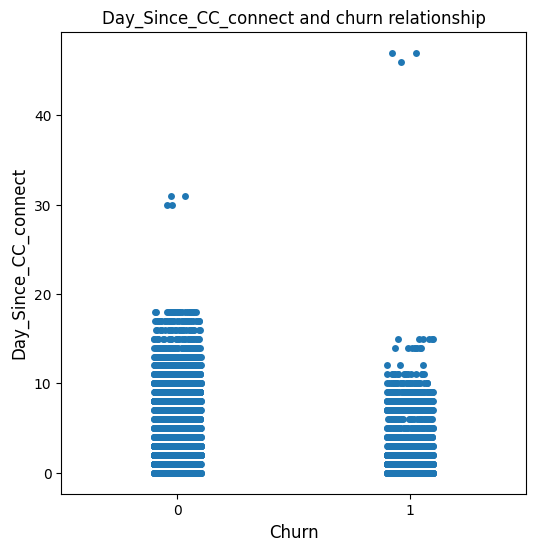

In [46]:
plt.figure(figsize=(6,6))
sns.stripplot(x='Churn', y='Day_Since_CC_connect', data=df_filtered).set_title('Day_Since_CC_connect and churn relationship')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Day_Since_CC_connect", fontsize=12)
plt.show()

- Relationships of continuouse columns with churn

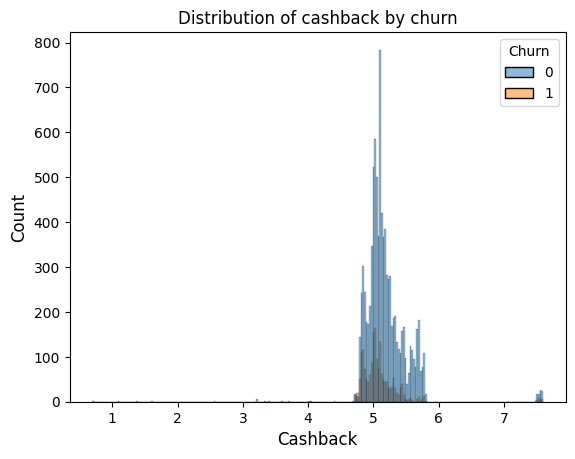

In [47]:
# histogram with churn col
sns.histplot(data=df_filtered, x=np.log(df_filtered["cashback"]), hue="Churn")
plt.xlabel("Cashback", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of cashback by churn")
plt.show()

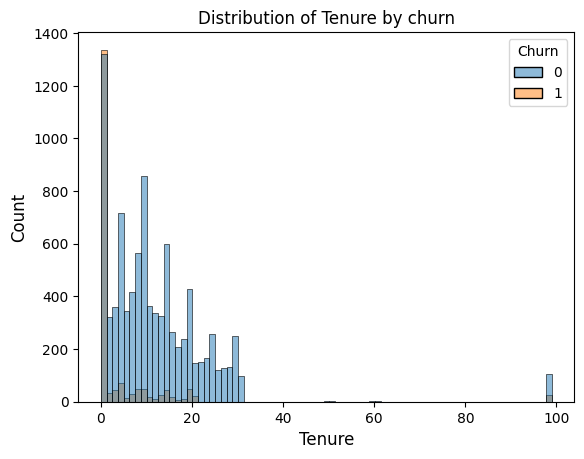

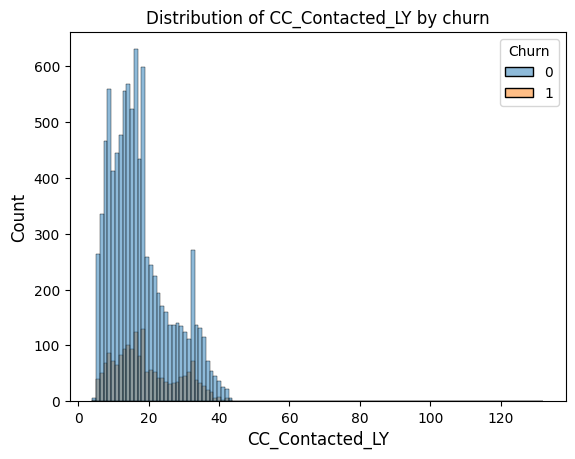

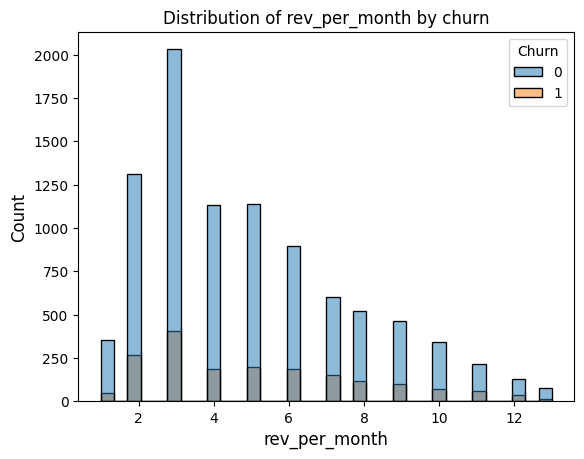

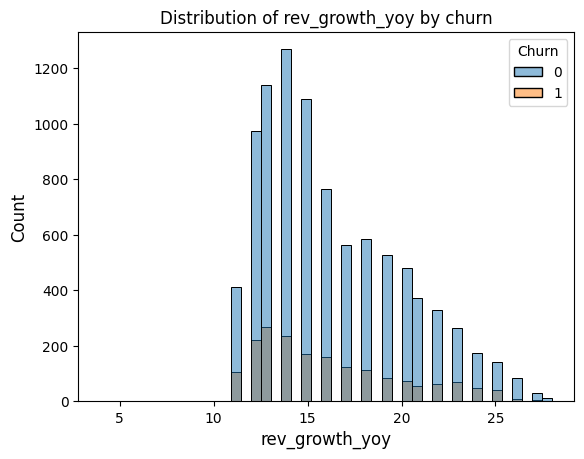

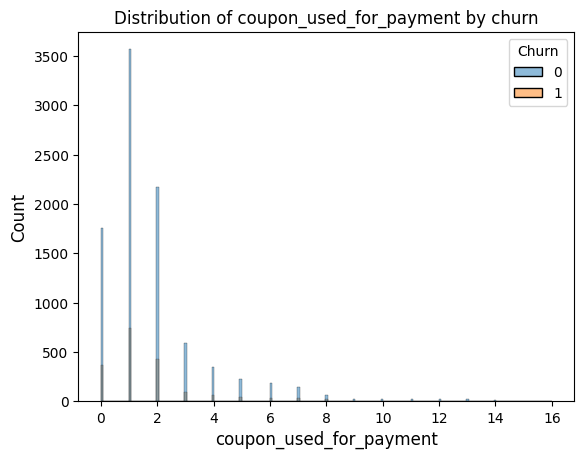

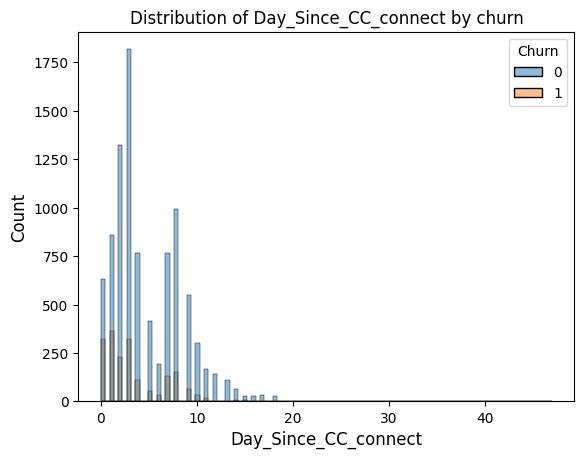

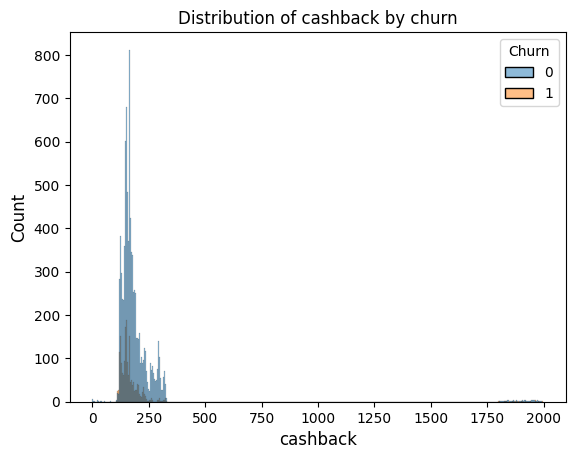

In [48]:
for col in num_cont_col:
    sns.histplot(data=df_filtered, x=col, hue="Churn")
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {col} by churn")
    plt.show()

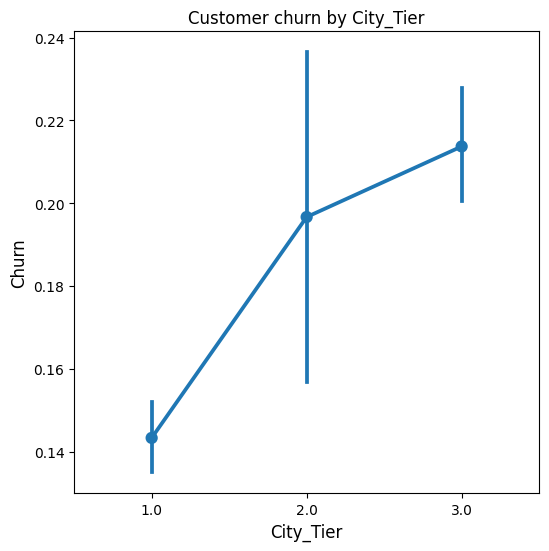

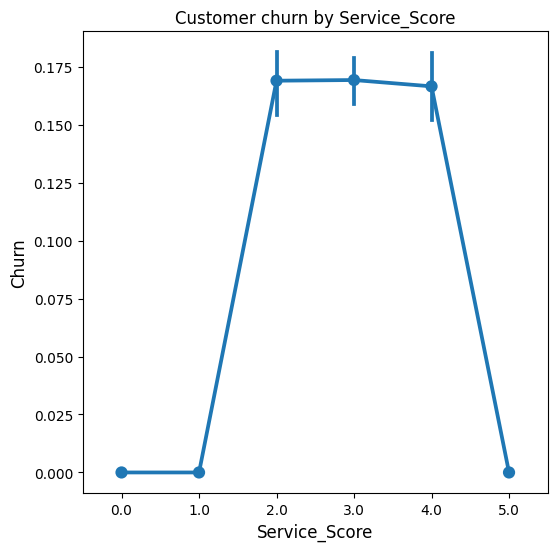

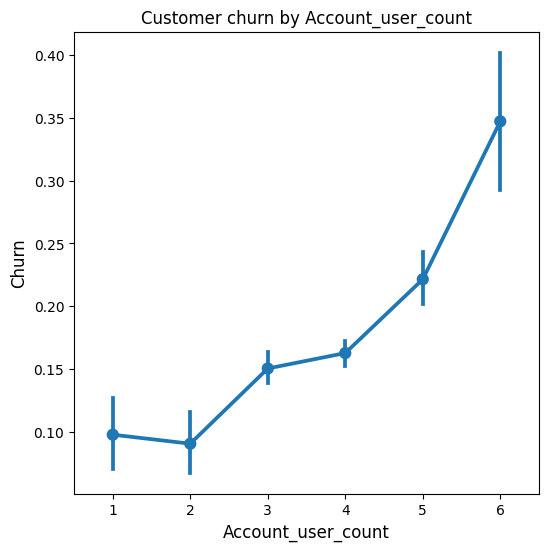

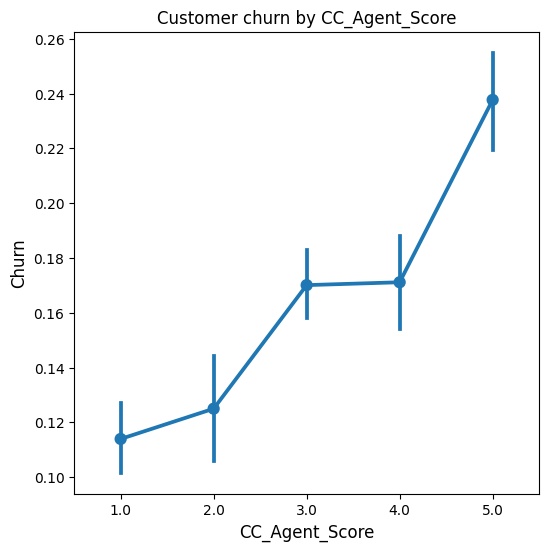

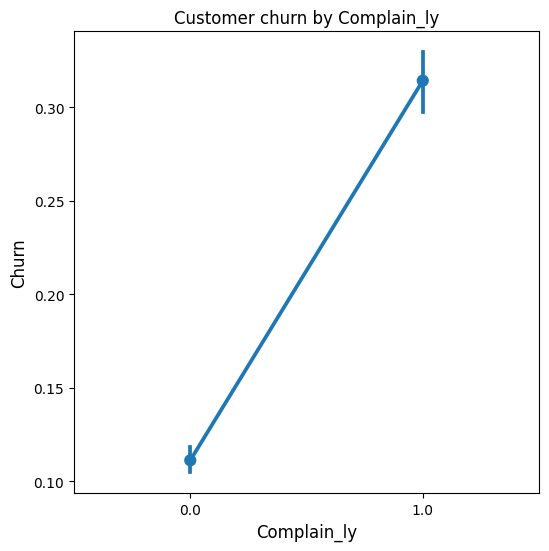

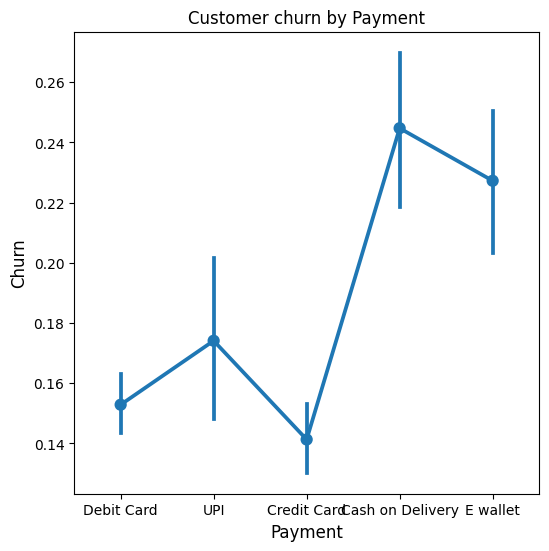

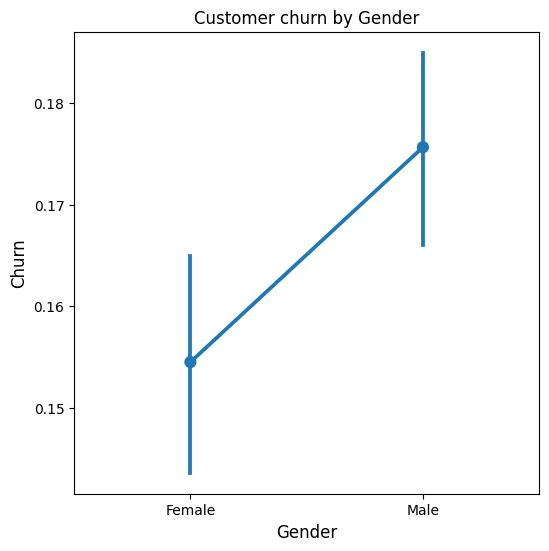

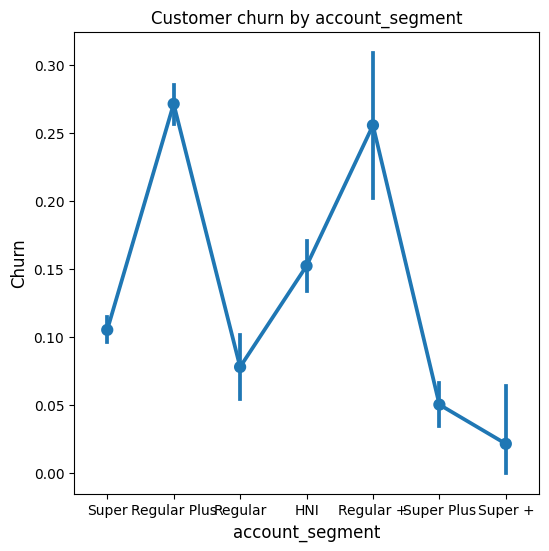

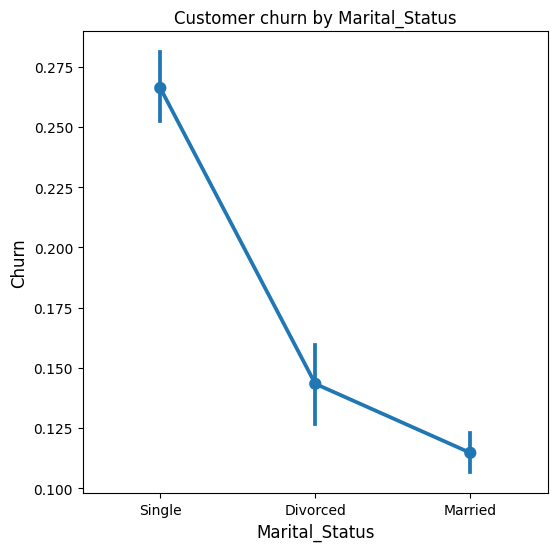

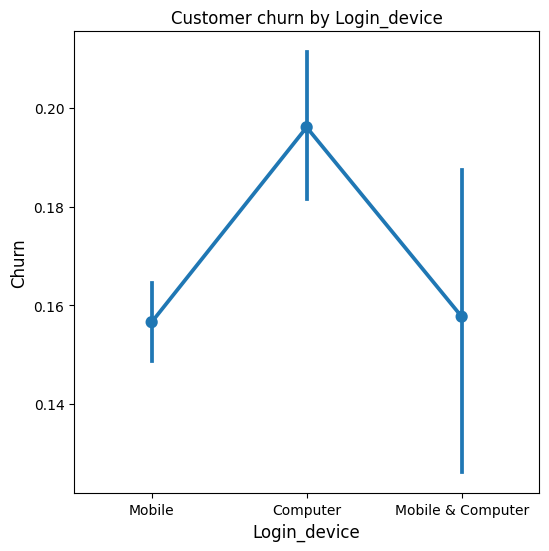

In [49]:
# linechart with churn col for categorical cols
cat_col = num_dis_col[1:] + obj_col

# plot target vs categorical columns:
for i, col in enumerate(cat_col):
    plt.figure(i, figsize=(6,6))
    sns.pointplot(x=col, y='Churn', data=df_filtered)
    plt.title("Customer churn by {}".format(col))
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Churn", fontsize=12)
    plt.show()  

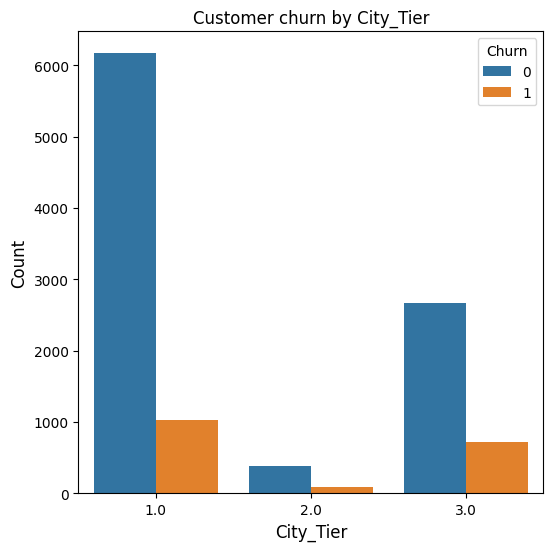

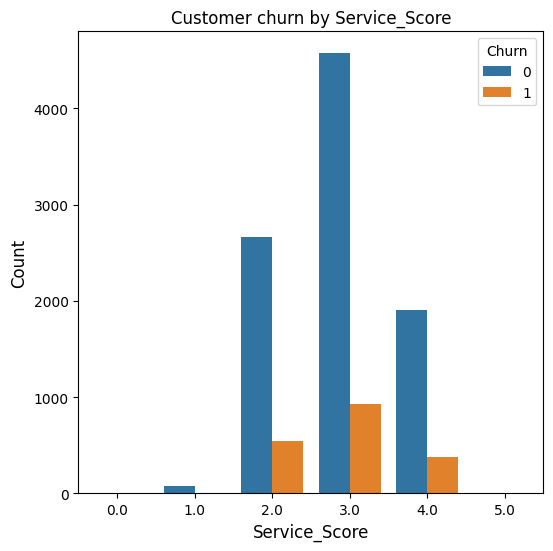

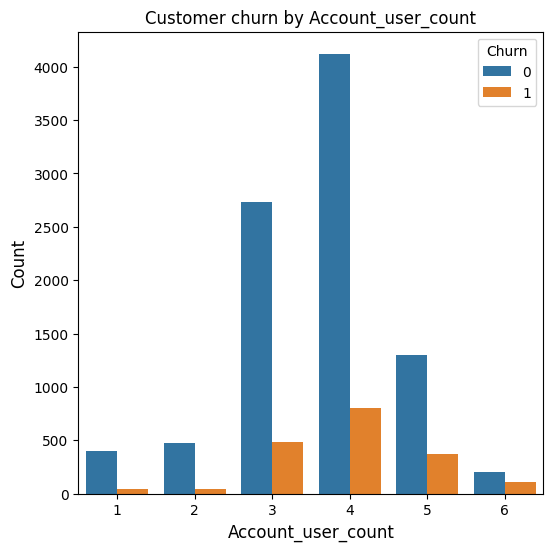

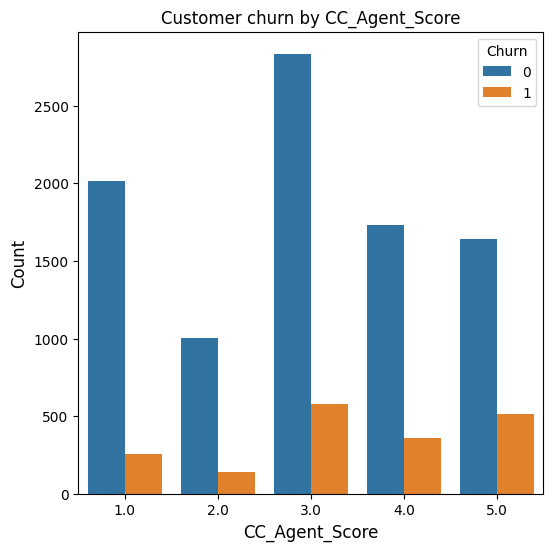

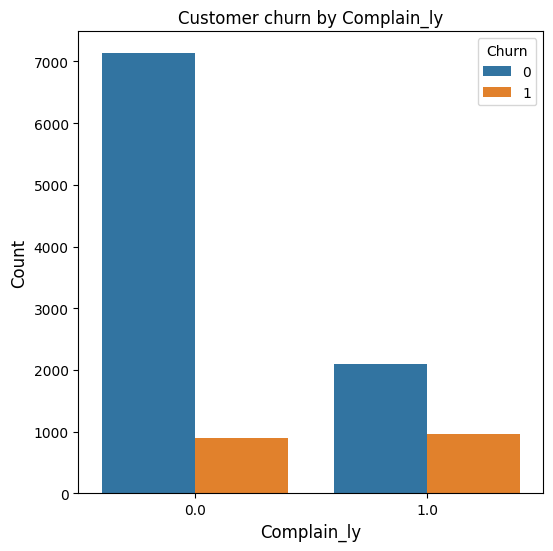

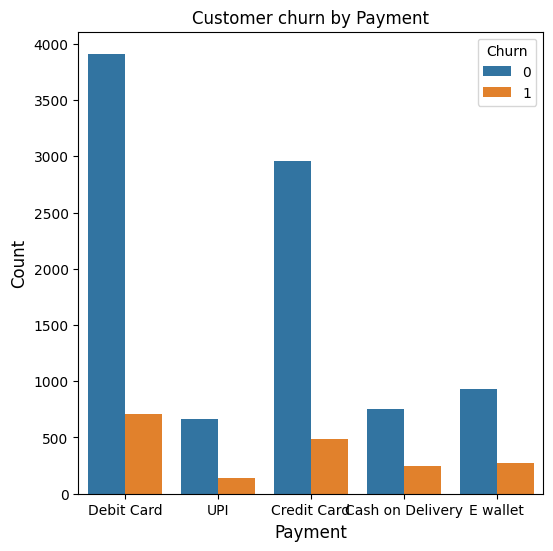

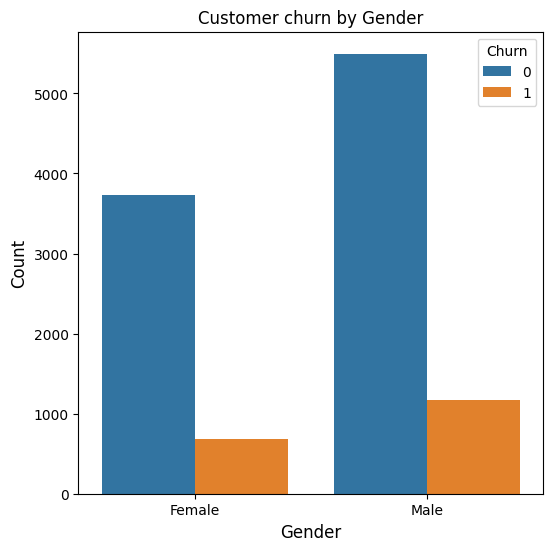

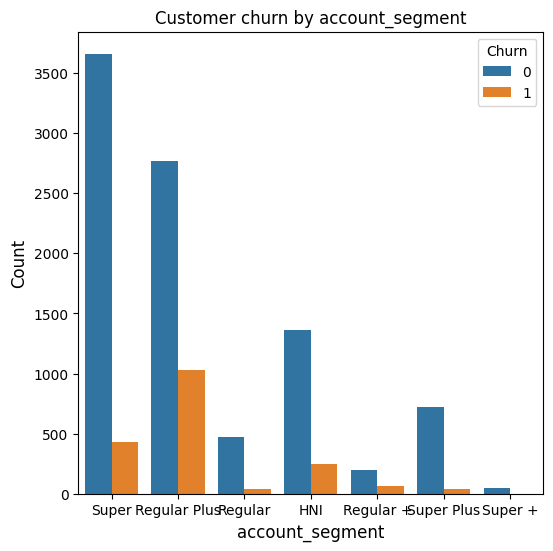

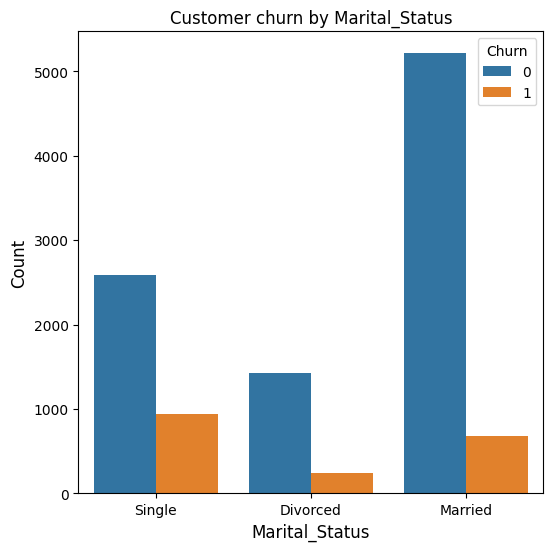

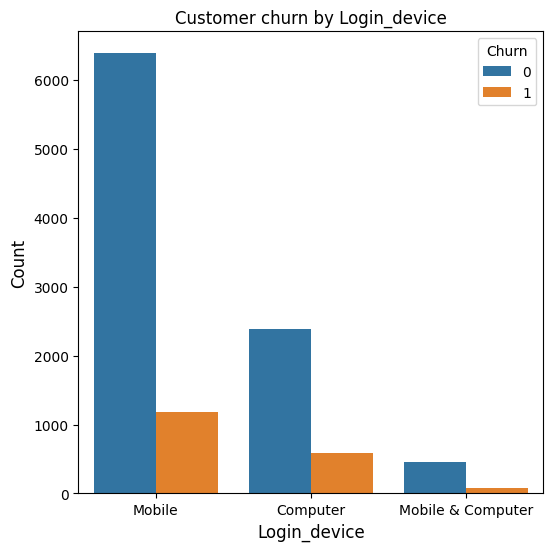

In [50]:
# bar plot of target vs categorical columns:
for i, col in enumerate(cat_col):
    plt.figure(i, figsize=(6,6))
    sns.countplot(df_filtered, x=col, hue='Churn')
    plt.title("Customer churn by {}".format(col))
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

In [51]:
print("For Mobile categories churn proportion:", df_filtered[df_filtered['Login_device'] == 'Mobile']['Churn'].value_counts()/len(df_filtered[df_filtered['Login_device'] == 'Mobile']['Churn']))
print("For Computer categories churn proportion:", df_filtered[df_filtered['Login_device'] == 'Computer']['Churn'].value_counts()/len(df_filtered[df_filtered['Login_device'] == 'Computer']['Churn']))
print("For Mobile & Computer categories churn proportion:", df_filtered[df_filtered['Login_device'] == 'Mobile & Computer']['Churn'].value_counts()/len(df_filtered[df_filtered['Login_device'] == 'Mobile & Computer']['Churn']))

For Mobile categories churn proportion: Churn
0    0.84342
1    0.15658
Name: count, dtype: float64
For Computer categories churn proportion: Churn
0    0.803908
1    0.196092
Name: count, dtype: float64
For Mobile & Computer categories churn proportion: Churn
0    0.842301
1    0.157699
Name: count, dtype: float64


In [52]:
# churn proportion by account segment
def churn_prop(col):
    for value in df_filtered[col].unique():
        print(f"For {value} churn proportion:", df_filtered[df_filtered[col] == value]['Churn'].value_counts()/len(df_filtered[df_filtered[col] == value]['Churn']))
        
churn_prop('account_segment')

For Super churn proportion: Churn
0    0.894866
1    0.105134
Name: count, dtype: float64
For Regular Plus churn proportion: Churn
0    0.728493
1    0.271507
Name: count, dtype: float64
For Regular churn proportion: Churn
0    0.922179
1    0.077821
Name: count, dtype: float64
For HNI churn proportion: Churn
0    0.847785
1    0.152215
Name: count, dtype: float64
For Regular + churn proportion: Churn
0    0.744275
1    0.255725
Name: count, dtype: float64
For Super Plus churn proportion: Churn
0    0.949868
1    0.050132
Name: count, dtype: float64
For Super + churn proportion: Churn
0    0.978723
1    0.021277
Name: count, dtype: float64


In [53]:
churn_prop('Marital_Status')

For Single churn proportion: Churn
0    0.73375
1    0.26625
Name: count, dtype: float64
For Divorced churn proportion: Churn
0    0.856629
1    0.143371
Name: count, dtype: float64
For Married churn proportion: Churn
0    0.885302
1    0.114698
Name: count, dtype: float64


In [54]:
churn_prop('Gender')

For Female churn proportion: Churn
0    0.845508
1    0.154492
Name: count, dtype: float64
For Male churn proportion: Churn
0    0.824359
1    0.175641
Name: count, dtype: float64


In [55]:
churn_prop('Payment')

For Debit Card churn proportion: Churn
0    0.84712
1    0.15288
Name: count, dtype: float64
For UPI churn proportion: Churn
0    0.825871
1    0.174129
Name: count, dtype: float64
For Credit Card churn proportion: Churn
0    0.858677
1    0.141323
Name: count, dtype: float64
For Cash on Delivery churn proportion: Churn
0    0.755266
1    0.244734
Name: count, dtype: float64
For E wallet churn proportion: Churn
0    0.772727
1    0.227273
Name: count, dtype: float64


In [56]:
churn_prop('Complain_ly')

For 1.0 churn proportion: Churn
0    0.68578
1    0.31422
Name: count, dtype: float64
For 0.0 churn proportion: Churn
0    0.888695
1    0.111305
Name: count, dtype: float64


In [57]:
churn_prop('City_Tier')

For 3.0 churn proportion: Churn
0    0.786302
1    0.213698
Name: count, dtype: float64
For 1.0 churn proportion: Churn
0    0.856706
1    0.143294
Name: count, dtype: float64
For 2.0 churn proportion: Churn
0    0.803347
1    0.196653
Name: count, dtype: float64


In [58]:
churn_prop('Service_Score')

For 3.0 churn proportion: Churn
0    0.830758
1    0.169242
Name: count, dtype: float64
For 2.0 churn proportion: Churn
0    0.831043
1    0.168957
Name: count, dtype: float64
For 1.0 churn proportion: Churn
0    1.0
Name: count, dtype: float64
For 0.0 churn proportion: Churn
0    1.0
Name: count, dtype: float64
For 4.0 churn proportion: Churn
0    0.833479
1    0.166521
Name: count, dtype: float64
For 5.0 churn proportion: Churn
0    1.0
Name: count, dtype: float64


In [59]:
churn_prop('Account_user_count')

For 3 churn proportion: Churn
0    0.849549
1    0.150451
Name: count, dtype: float64
For 4 churn proportion: Churn
0    0.837261
1    0.162739
Name: count, dtype: float64
For 5 churn proportion: Churn
0    0.778511
1    0.221489
Name: count, dtype: float64
For 2 churn proportion: Churn
0    0.909441
1    0.090559
Name: count, dtype: float64
For 1 churn proportion: Churn
0    0.902273
1    0.097727
Name: count, dtype: float64
For 6 churn proportion: Churn
0    0.652733
1    0.347267
Name: count, dtype: float64


In [60]:
churn_prop('CC_Agent_Score')

For 2.0 churn proportion: Churn
0    0.875
1    0.125
Name: count, dtype: float64
For 3.0 churn proportion: Churn
0    0.829918
1    0.170082
Name: count, dtype: float64
For 5.0 churn proportion: Churn
0    0.762326
1    0.237674
Name: count, dtype: float64
For 4.0 churn proportion: Churn
0    0.828872
1    0.171128
Name: count, dtype: float64
For 1.0 churn proportion: Churn
0    0.886054
1    0.113946
Name: count, dtype: float64


### Multivariate analysis of features

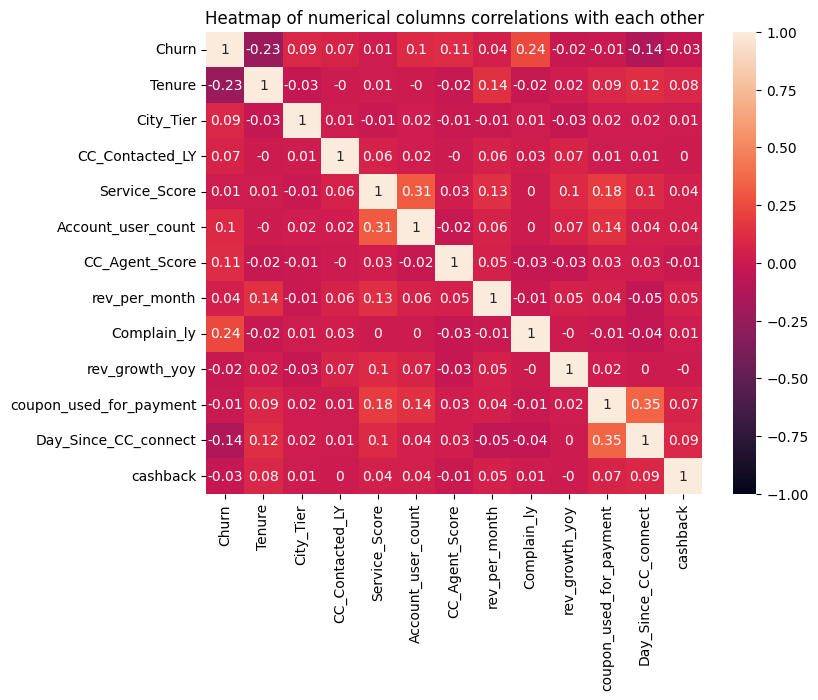

In [61]:
# Heat map of num cols
plt.figure(figsize=(8,6))
sns.heatmap(round(df_filtered[num_col].corr(),2), annot=True, vmin=-1, vmax=1)
plt.title("Heatmap of numerical columns correlations with each other")
plt.show()

###  Various pivot tables and plots to find insights that affect the customer churn

In [62]:
# with cashback value and churn relations
pd.pivot_table(df_filtered,values='cashback', index='Marital_Status', columns='Churn', aggfunc='mean')

Churn,0,1
Marital_Status,,
Divorced,204.169188,184.889707
Married,198.786077,187.312770
Single,190.770151,179.312015


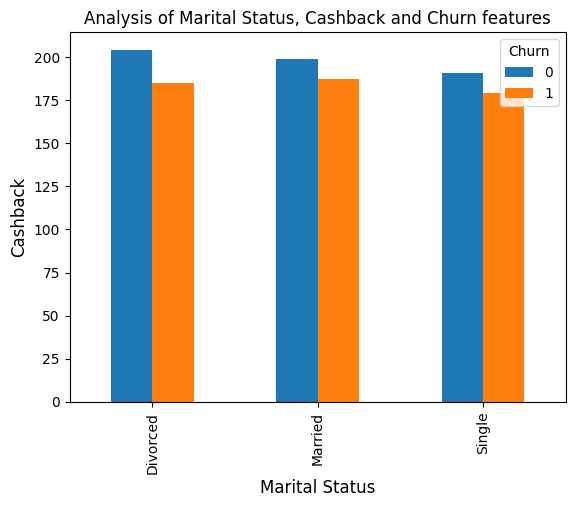

In [63]:
pd.pivot_table(df_filtered,values='cashback', index='Marital_Status', columns='Churn', aggfunc='mean').plot(kind='bar')
plt.title("Analysis of Marital Status, Cashback and Churn features")
plt.xlabel(f"Marital Status", fontsize=12)
plt.ylabel("Cashback", fontsize=12)
plt.show()

In [64]:
# rev per month and gender with churn as hue
pd.pivot_table(df_filtered,values='rev_per_month', index='Gender', columns='Churn', aggfunc='mean')

Churn,0,1
Gender,,
Female,5.111886,4.792952
Male,4.829694,5.447481


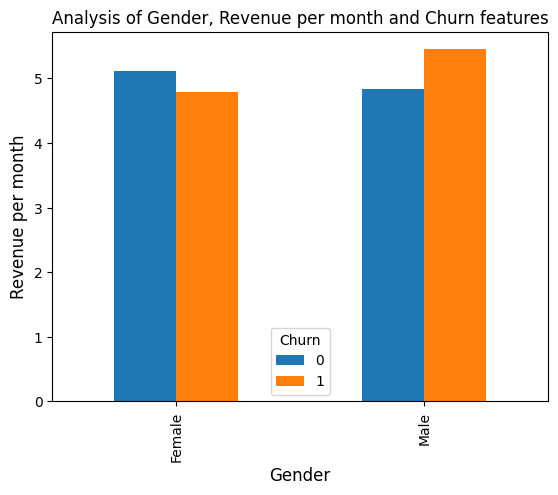

In [65]:
pd.pivot_table(df_filtered,values='rev_per_month', index='Gender', columns='Churn', aggfunc='mean').plot(kind='bar')
plt.title("Analysis of Gender, Revenue per month and Churn features")
plt.xlabel(f"Gender", fontsize=12)
plt.ylabel("Revenue per month", fontsize=12)
plt.show()

In [66]:
# chart with rev growth yoy and city tier along with churn
pd.pivot_table(df_filtered,values='rev_growth_yoy', index='City_Tier', columns='Churn', aggfunc='mean')

Churn,0,1
City_Tier,,
1.0,16.279689,16.272551
2.0,15.695312,14.851064
3.0,16.108785,15.900963


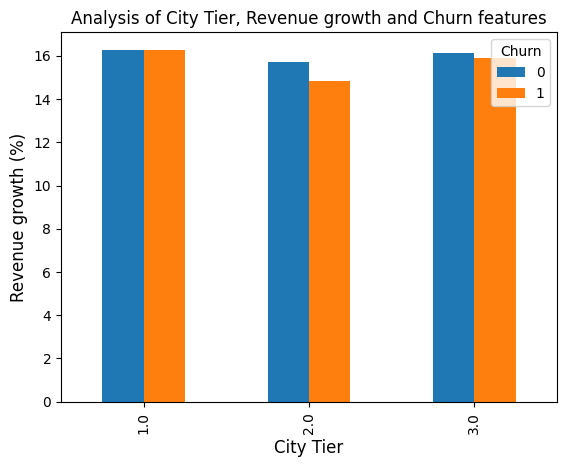

In [67]:
pd.pivot_table(df_filtered,values='rev_growth_yoy', index='City_Tier', columns='Churn', aggfunc='mean').plot(kind='bar')
plt.title("Analysis of City Tier, Revenue growth and Churn features")
plt.xlabel(f"City Tier", fontsize=12)
plt.ylabel("Revenue growth (%)", fontsize=12)
plt.show()

In [68]:
# Analysis of Tenure, marital status and churn features
pd.pivot_table(df_filtered,values='Tenure', index='Marital_Status', columns='Churn', aggfunc='mean')

Churn,0,1
Marital_Status,,
Divorced,12.661064,4.924686
Married,12.424376,4.137778
Single,11.565957,4.273987


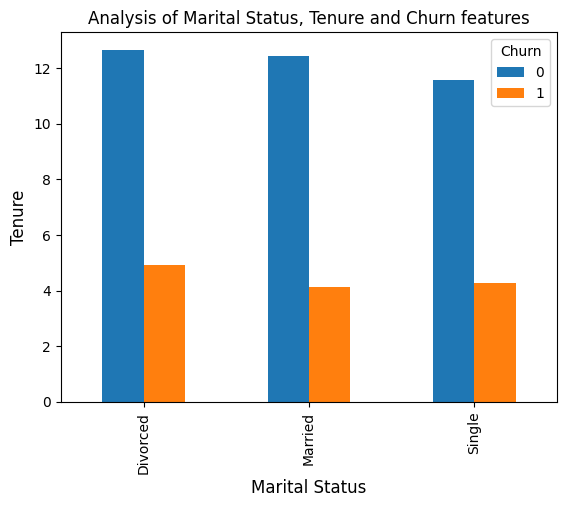

In [69]:
pd.pivot_table(df_filtered,values='Tenure', index='Marital_Status', columns='Churn', aggfunc='mean').plot(kind='bar')
plt.title("Analysis of Marital Status, Tenure and Churn features")
plt.xlabel(f"Marital Status", fontsize=12)
plt.ylabel("Tenure", fontsize=12)
plt.show()

In [70]:
# Analysis of Tenure, marital status and churn features
pd.pivot_table(df_filtered, values='CC_Contacted_LY', index='Payment', columns='Churn', aggfunc='mean')

Churn,0,1
Payment,,
Cash on Delivery,17.970784,16.413934
Credit Card,17.711727,19.782341
Debit Card,17.340746,18.845609
E wallet,18.064171,20.920000
UPI,16.902108,21.335714


In [71]:
pd.pivot_table(df_filtered, values='Day_Since_CC_connect', index='account_segment', columns='Churn', aggfunc='mean')

Churn,0,1
account_segment,,
HNI,6.073584,5.954918
Regular,7.206751,8.125000
Regular +,3.241026,1.850746
Regular Plus,3.242326,2.439922
Super,4.988525,3.688372
Super +,6.847826,9.000000
Super Plus,6.329167,7.631579


In [72]:
pd.pivot_table(df_filtered, values='coupon_used_for_payment', index='Marital_Status', columns='Churn', aggfunc='mean')

Churn,0,1
Marital_Status,,
Divorced,1.920168,2.217573
Married,1.814587,1.691852
Single,1.698259,1.621535


In [73]:
pd.pivot_table(df_filtered, values='cashback', index='Login_device', columns='Churn', aggfunc='mean')

Churn,0,1
Login_device,,
Computer,192.204619,164.568625
Mobile,200.456176,193.683013
Mobile & Computer,181.184824,159.130824


In [74]:
pd.pivot_table(df_filtered, values='Tenure', index='Login_device', columns='Churn', aggfunc='mean')

Churn,0,1
Login_device,,
Computer,12.208718,3.864261
Mobile,12.243929,4.578059
Mobile & Computer,11.951542,3.588235


## Data Pre-processing and transformations

- Steps to follow: Feature encoding, Feature standardization, clustering, SMOTE to balance data 

In [75]:
# encode features using pandas dummies
encode_df = pd.get_dummies(df_filtered, columns=obj_col, drop_first=True, dtype=float)
encode_df.shape

(11075, 28)

In [76]:
# new dataframe with encoded encoded values
encode_df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile,Login_device_Mobile & Computer
0,1,4,3.0,6.0,3.0,3,2.0,9,1.0,11,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,0,1.0,8.0,3.0,4,3.0,7,1.0,15,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,1.0,30.0,2.0,4,3.0,6,1.0,14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,0,3.0,15.0,2.0,4,5.0,8,0.0,23,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,0,1.0,12.0,2.0,3,5.0,3,0.0,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [77]:
# feature standardization with clustering
df_cluster = encode_df.copy()

# Standardize numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Assign clustering labels to each sample
df_cluster['Cluster_Labels'] = kmeans.labels_
df_cluster.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile,Login_device_Mobile & Computer,Cluster_Labels
0,1,4,3.0,6.0,3.0,3,2.0,9,1.0,11,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,1,0,1.0,8.0,3.0,4,3.0,7,1.0,15,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,1,0,1.0,30.0,2.0,4,3.0,6,1.0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
3,1,0,3.0,15.0,2.0,4,5.0,8,0.0,23,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,1,0,1.0,12.0,2.0,3,5.0,3,0.0,11,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [78]:
df_cluster['Cluster_Labels'].value_counts()

Cluster_Labels
0    5370
1    4162
2    1543
Name: count, dtype: int64

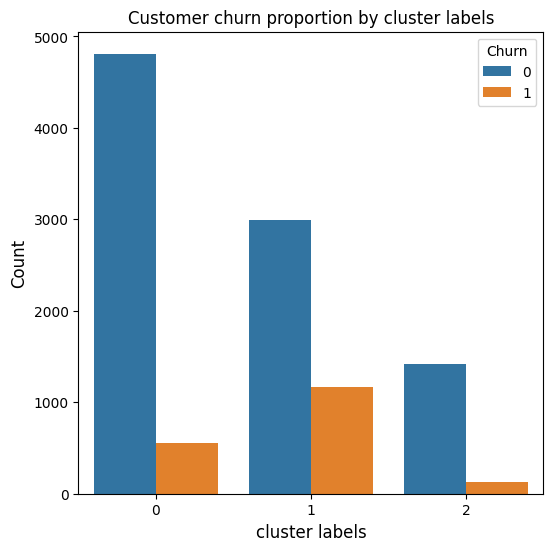

In [79]:
plt.figure(figsize=(6,6))
sns.countplot(df_cluster, x='Cluster_Labels', hue='Churn')
plt.title("Customer churn proportion by cluster labels".format(col))
plt.xlabel("cluster labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [80]:
# find the proportions
print("For cluster label 0:", df_cluster[df_cluster['Cluster_Labels'] == 0]['Churn'].value_counts()/len(df_cluster[df_cluster['Cluster_Labels'] == 0]['Churn']))
print("For cluster label 1:", df_cluster[df_cluster['Cluster_Labels'] == 1]['Churn'].value_counts()/len(df_cluster[df_cluster['Cluster_Labels'] == 1]['Churn']))
print("For cluster label 2:", df_cluster[df_cluster['Cluster_Labels'] == 2]['Churn'].value_counts()/len(df_cluster[df_cluster['Cluster_Labels'] == 2]['Churn']))

For cluster label 0: Churn
0    0.895903
1    0.104097
Name: count, dtype: float64
For cluster label 1: Churn
0    0.719606
1    0.280394
Name: count, dtype: float64
For cluster label 2: Churn
0    0.918341
1    0.081659
Name: count, dtype: float64


In [81]:
# feature engineering of service score and agent score columns with new addition of new feature
df_cluster['Avg_customer_satisfaction'] = (df_cluster['Service_Score'] + df_cluster['CC_Agent_Score'])/2

# remove old columns
df_new = df_cluster.drop(['Service_Score','CC_Agent_Score'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11075 entries, 0 to 11259
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn                           11075 non-null  int64  
 1   Tenure                          11075 non-null  int64  
 2   City_Tier                       11075 non-null  float64
 3   CC_Contacted_LY                 11075 non-null  float64
 4   Account_user_count              11075 non-null  int64  
 5   rev_per_month                   11075 non-null  int64  
 6   Complain_ly                     11075 non-null  float64
 7   rev_growth_yoy                  11075 non-null  int64  
 8   coupon_used_for_payment         11075 non-null  int64  
 9   Day_Since_CC_connect            11075 non-null  int64  
 10  cashback                        11075 non-null  float64
 11  Payment_Credit Card             11075 non-null  float64
 12  Payment_Debit Card              11075

In [82]:
# SMOTE Upsamplling to balance the dataset for ML modeling
X_n = df_new.drop('Churn', axis=1)
y_n = df_new['Churn']

over_sampling = SMOTE(sampling_strategy='minority', random_state=42)
X_n, y_n = over_sampling.fit_resample(X_n,y_n)
print("New balanced classes")
y_n.value_counts()

New balanced classes


Churn
1    9223
0    9223
Name: count, dtype: int64

In [83]:
X_n.shape, y_n.shape

((18446, 27), (18446,))

In [84]:
# standardization of train and test dataset to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, 
                                              train_size=0.75, 
                                              random_state=42)

# standarad scaler for
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_test.shape, X_train.shape, y_train.shape, y_test.shape

((4612, 27), (13834, 27), (13834,), (4612,))

## Machine Learning Modeling, Evaluation, Tuning, Interpretation, and Comparison

In [85]:
# fit the data to ML models
# decision tree modeling
dt = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=20)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
classif_report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(classif_report)
print(accuracy)
print(recall)
print(precision)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2324
           1       0.96      0.97      0.97      2288

    accuracy                           0.97      4612
   macro avg       0.97      0.97      0.97      4612
weighted avg       0.97      0.97      0.97      4612

0.9679098005203816
0.9715909090909091
0.9640069384215091


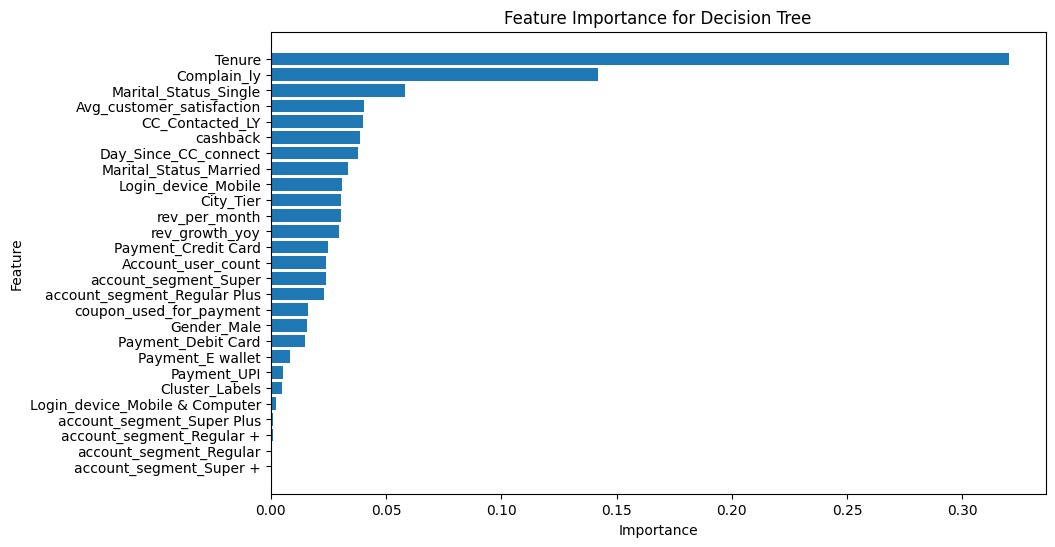

In [86]:
# Get feature importances from the trained model
feature_importances = dt.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_n.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree')
plt.show()

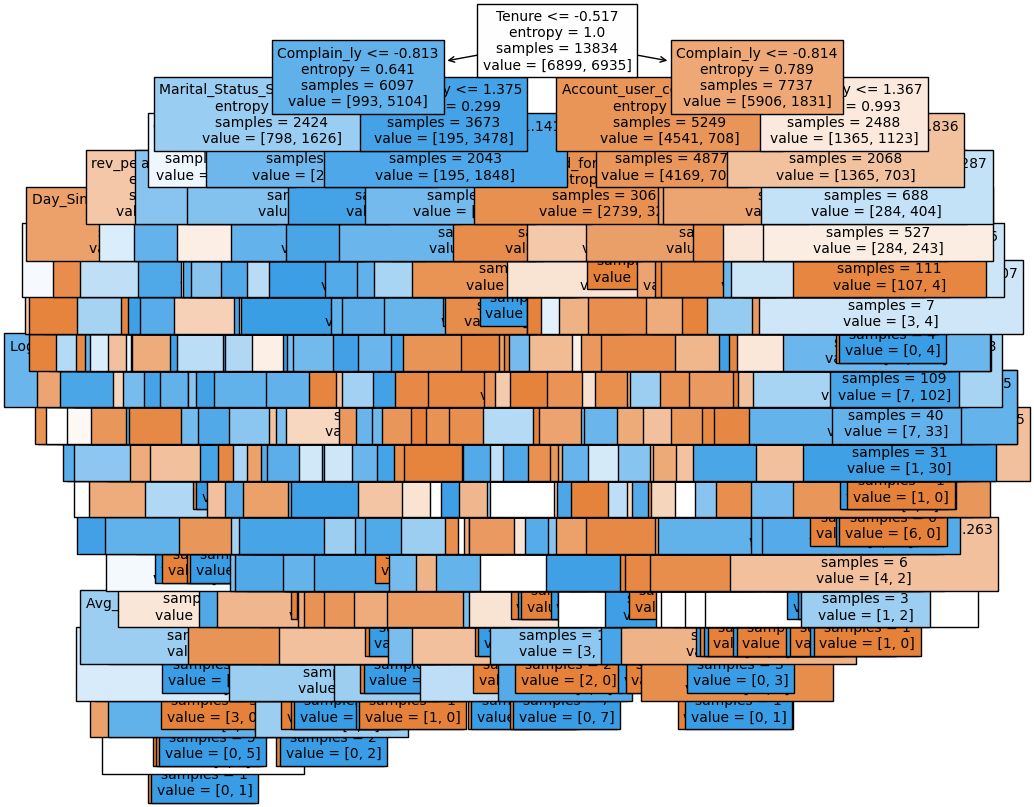

In [87]:
# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(dt, filled=True, feature_names=X_n.columns, fontsize=10)
plt.show()

In [88]:
# confusion matrix
def confusion_matri(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[0,1])
    tp, fp, fn, tn = cm.ravel()
    #plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='.2f', 
                xticklabels =['Not Churn','Churn'],
                yticklabels =['Not Churn','Churn'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")
    plt.show()
    return tn,fp,fn,tp

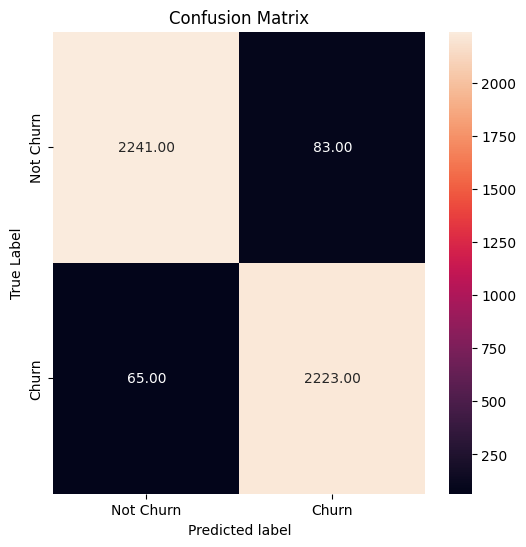

(2223, 83, 65, 2241)

In [89]:
confusion_matri(y_test,y_pred)

In [90]:
# plotting roc-auc curve
def draw_roc(actual, proba):
    fpr, tpr, thresholds = roc_curve(actual, proba,drop_intermediate=False)
    auc_score = roc_auc_score(actual, proba)
    # plot the curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label="ROC curve(area={})".format(round(auc_score,2)))
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(visible=True, color='wheat', linestyle='--')
    plt.legend(loc="lower right")
    plt.title("ROC-AUC Curve")
    plt.show()
    return fpr, tpr, thresholds

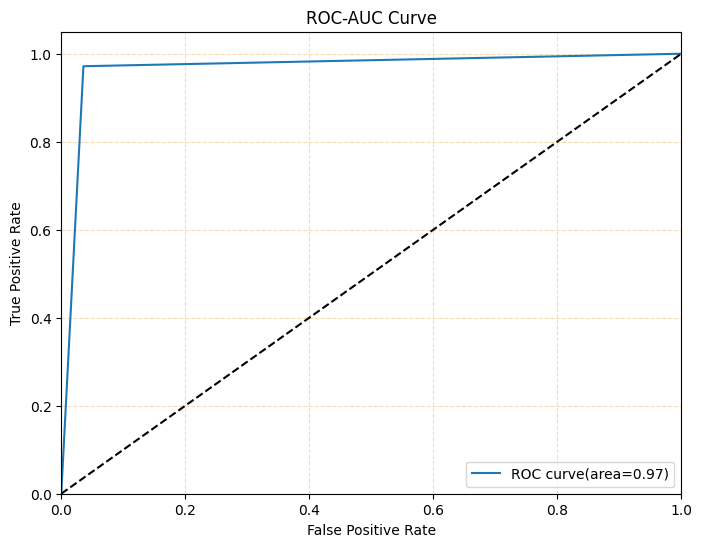

In [91]:
fpr, tpr, thresholds = draw_roc(y_test,y_pred)

### Feature selection and model tuning

In [102]:
# modeling using updated params and imp features 
Imp_cols = feature_importance_df[feature_importance_df['Importance'] > 0.02]['Feature'].to_list()
X_new = X_n[Imp_cols]

# standardization of train and test dataset to avoid data leakage
X_trn, X_tst, y_trn, y_tst = train_test_split(X_new, y_n, 
                                              train_size=0.75, 
                                              random_state=42)

# standarad scaler for
scaler = StandardScaler()
scaler.fit(X_trn)
X_trn= scaler.transform(X_trn)
X_tst= scaler.transform(X_tst)
X_tst.shape, X_trn.shape, y_trn.shape, y_tst.shape

((4612, 16), (13834, 16), (13834,), (4612,))

In [107]:
dt1 = DecisionTreeClassifier(criterion='gini', 
                            random_state=42,
                            max_depth=15,
                            min_samples_split=2,
                            max_features=15)
dt1.fit(X_trn,y_trn)
y_pred2 = dt1.predict(X_tst)
classif_report = classification_report(y_tst,y_pred2)
accuracy = accuracy_score(y_tst, y_pred2)
precision = precision_score(y_tst, y_pred2)
recall = recall_score(y_tst, y_pred2)
print(classif_report)
print(accuracy)
print(recall)
print(precision)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2324
           1       0.96      0.96      0.96      2288

    accuracy                           0.96      4612
   macro avg       0.96      0.96      0.96      4612
weighted avg       0.96      0.96      0.96      4612

0.9603209019947961
0.9645979020979021
0.9558250324815938


In [92]:
# 2. knn modeling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
classif_report1 = classification_report(y_test,y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
print(classif_report1)
print(accuracy1)
print(recall1)
print(precision1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2324
           1       0.97      1.00      0.98      2288

    accuracy                           0.98      4612
   macro avg       0.98      0.98      0.98      4612
weighted avg       0.98      0.98      0.98      4612

0.9822202948829142
0.9969405594405595
0.9681663837011885


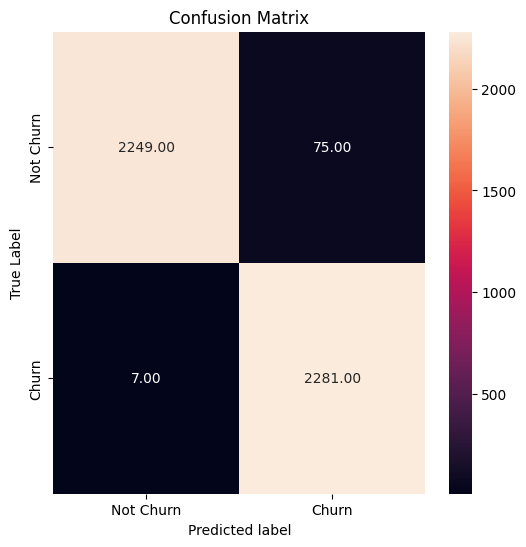

(2281, 75, 7, 2249)

In [93]:
# confusion matrix for KNN algorithma
confusion_matri(y_test,y_pred1)

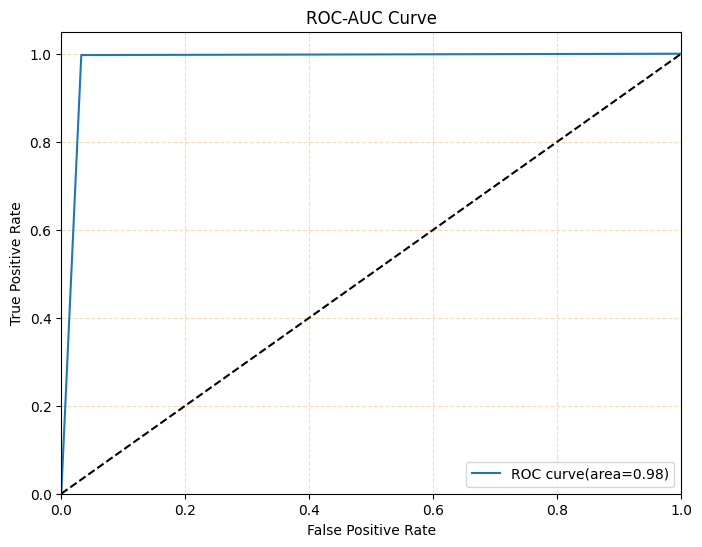

In [94]:
fpr, tpr, thresholds = draw_roc(y_test,y_pred1)

## Business Recommendations

### Recommendations based on churn values

### Recommendations based on cluster labels

### Recommendations based on model output and interpretations